# Adding Non-Gaussian Noise to Signal from Generator to Test Filtering Techniques

import signals gathered from oscilloscope and read into a pandas df

shift signals as necessary

Length of dataset: 87364


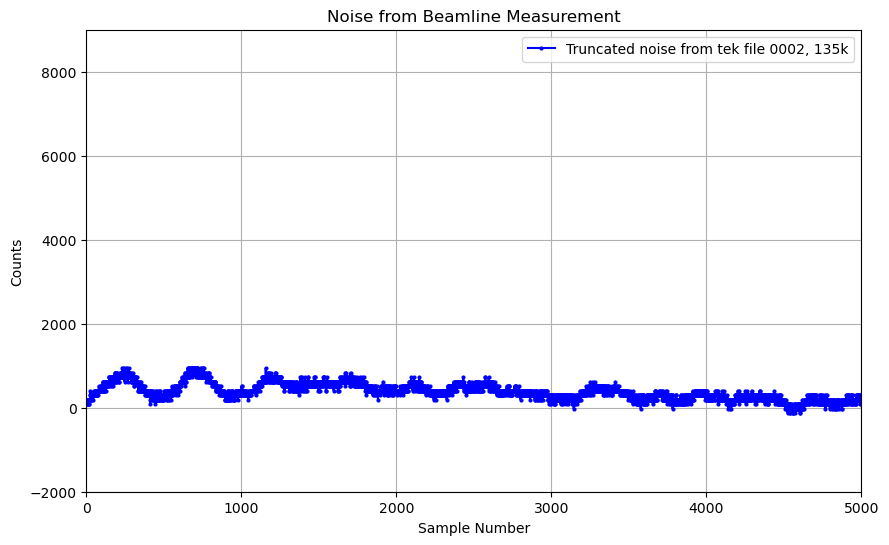

In [221]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\brian\Downloads\pip2it\pip2it\tek0002CH2_truncated.csv"

# Skip the first 21 rows, use only the second column, and specify column names
df_noise = pd.read_csv(file_path, skiprows=21, usecols=[5], header=None, names=['Value'], dtype={'Value': float})
df_noise2 = pd.read_csv(file_path, skiprows=21, usecols=[6], header=None, names=['Value'], dtype={'Value': float})
df_noise3 = pd.read_csv(file_path, skiprows=21, usecols=[7], header=None, names=['Value'], dtype={'Value': float})

# Print length of the dataset (number of rows read)
print("Length of dataset:", len(df_noise))

# Number of samples to plot (adjustable)
num_samples = len(df_noise)  # Arbitrary number chosen

# Plot the data
plt.figure(figsize=(10, 6))
#plt.plot(df_noise.index, df_noise3['Value'], marker='.', linestyle='-', color='y', markersize=2, label ='Noise from tek0002CH2.csv') #plt.title('Stream A from Oscilloscope Data')
#plt.plot(df_noise.index, df_noise2['Value'], marker='*', linestyle='-', color='g', markersize=2, label ='Truncated noise from tek file 0002, 200k')
plt.plot(df_noise.index, df_noise['Value'], marker='o', linestyle='-', color='b', markersize=2, label = 'Truncated noise from tek file 0002, 135k')
plt.xlabel('Sample Number')
plt.ylabel('Counts')
plt.title('Noise from Beamline Measurement')
plt.legend()
plt.grid(True)
plt.xlim(0, 5000)  # Set x-axis limits
plt.ylim(-2000, 9000)  # Set x-axis limits
plt.savefig("just_noise.png")
plt.show()

DataFrame has been exported to C:\Users\brian\jpn_fermi\tek0002CH2_added_streamA.csv
DataFrame has been exported to C:\Users\brian\jpn_fermi\tek0002CH2_added_streamB.csv


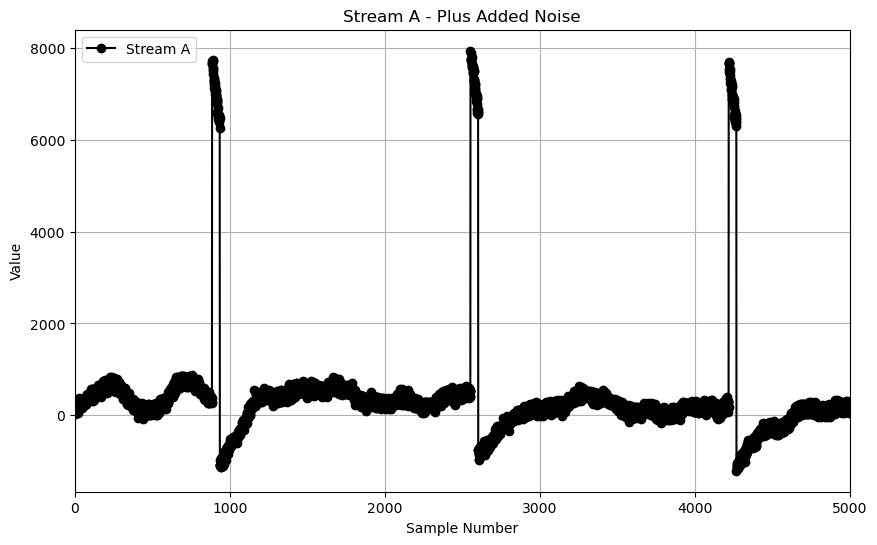

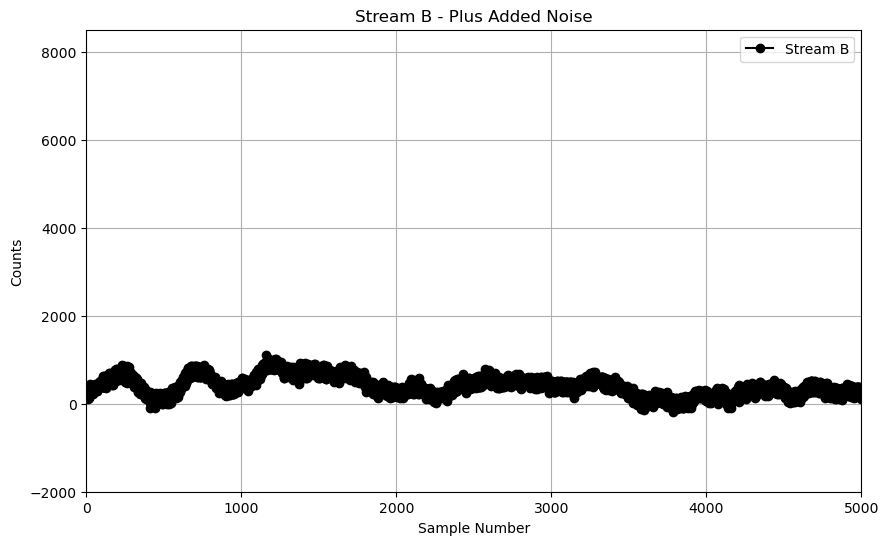

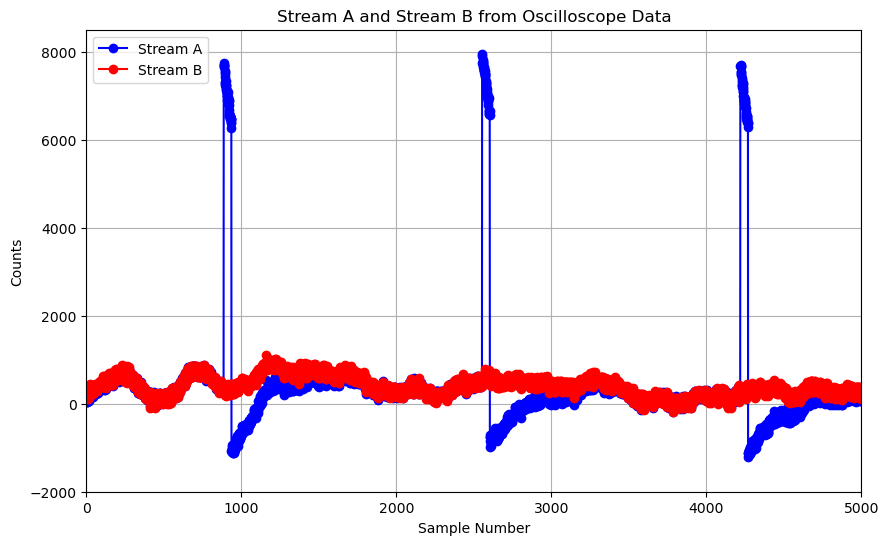

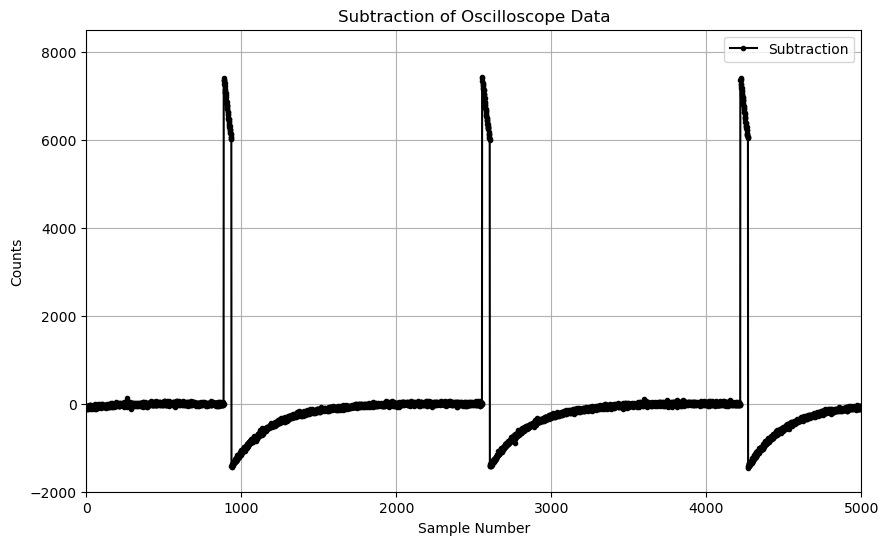

<Figure size 640x480 with 0 Axes>

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


stream_A_filepath = file_path = r"C:\Users\brian\jpn_fermi\data_file_2024-07-09_16-28-42.csv"
stream_A_read = pd.read_csv(stream_A_filepath, skiprows=1, header=None, names=['Value'], dtype={'Value': float})

stream_B_filepath = r"C:\Users\brian\jpn_fermi\data_file_2024-07-09_16-30-12.csv"
stream_B_read = pd.read_csv(stream_B_filepath, skiprows=1, header=None, names=['Value'], dtype={'Value': float})

start_sample = 50 
end_sample = len(stream_A_read) 

A = stream_A_read.iloc[start_sample:end_sample] 
B = stream_B_read.iloc[start_sample:end_sample] 

# Specify the filepath to export the CSV files
noisyA_filepath = r"C:\Users\brian\jpn_fermi\tek0002CH2_added_streamA.csv"
noisyB_filepath = r"C:\Users\brian\jpn_fermi\tek0002CH2_added_streamB.csv"

# adjust df1 and df2 / shift so that they align

A_shift = A[550:].reset_index(drop=True) #shifts df to begin at data point 287 and resets the first index to 0

B_shift = B[50:].reset_index(drop=True)

# number of samples to plot (adjustable)
num_samples = 5000 # arbitrary number chosen
stream_A = A_shift.head(num_samples) + df_noise
stream_B = B_shift.head(num_samples) + df_noise

# Export DataFrame to CSV file
stream_A.to_csv(noisyA_filepath, index=False)
stream_B.to_csv(noisyB_filepath, index=False)
print(f"DataFrame has been exported to {noisyA_filepath}")
print(f"DataFrame has been exported to {noisyB_filepath}")

# Subtraction of stream B from stream A
df_subtraction = stream_A - stream_B
len(df_subtraction) 

# Plotting
import matplotlib.pyplot as plt

# Plotting stream_A
plt.figure(figsize=(10, 6))
plt.plot(stream_A.index, stream_A['Value'], marker='o', linestyle='-', color='k', label='Stream A')
plt.title('Stream A - Plus Added Noise')
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.xlim(0, 5000)  # Set x-axis limits
plt.savefig("noisy_streamA.png")
plt.show()

# Plotting stream_B
plt.figure(figsize=(10, 6))
plt.plot(stream_B.index, stream_B['Value'], marker='o', linestyle='-', color='k', label='Stream B')
plt.title('Stream B - Plus Added Noise')
plt.xlabel('Sample Number')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.xlim(0, 5000)
plt.ylim(-2000, 8500) # Set x-axis limits
plt.savefig("noisy_streamB.png")
plt.show()

# Plotting stream_A and stream_B on the same plot
plt.figure(figsize=(10, 6))
plt.plot(stream_A.index, stream_A['Value'], marker='o', linestyle='-', color='b', label='Stream A')
plt.plot(stream_B.index, stream_B['Value'], marker='o', linestyle='-', color='r', label='Stream B')
plt.title('Stream A and Stream B from Oscilloscope Data')
plt.xlabel('Sample Number')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.xlim(0, 5000)
plt.ylim(-2000, 8500)# Set x-axis limits
plt.show()

# Plotting df_subtraction
plt.figure(figsize=(10, 6))
plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Subtraction')
plt.title('Subtraction of Oscilloscope Data')
plt.xlabel('Sample Number')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.xlim(0, 5000)
plt.ylim(-2000, 8500)# Set x-axis limits
plt.savefig("df_sub.png")
plt.show()


# Adjust layout
plt.tight_layout()
# Display the plot
plt.show()



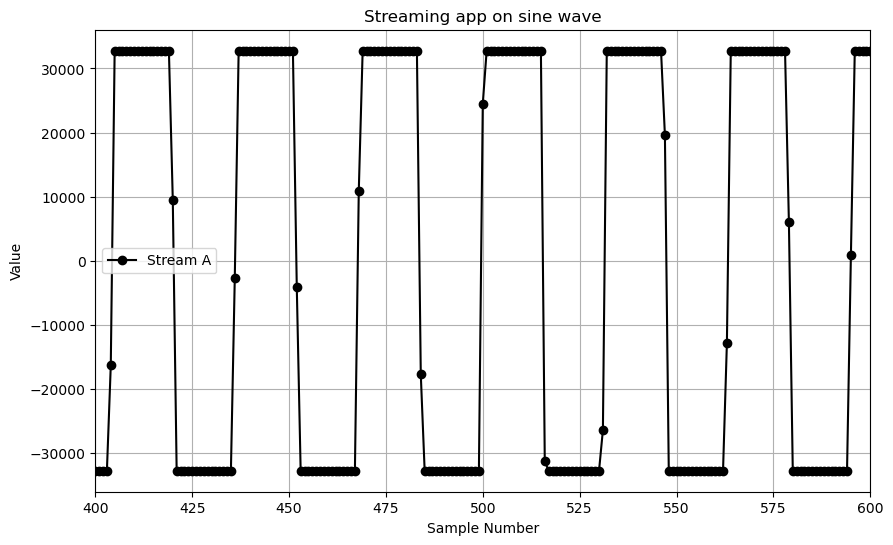

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = r"C:\FermiSummer24\rpsa_client-2.00-35-aff683518\data_file_131.225.130.81_2024-08-01_20-52-38.csv"

# Read the CSV file into a DataFrame, specifying no header
data = pd.read_csv(file_path, header=None)

# Assign column names
data.columns = ['Sample Number', 'Value']

# Extract columns for plotting
sample_number = data['Sample Number']
value = data['Value']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(sample_number, value, marker='o', linestyle='-', color='k', label='Stream A')
plt.title('Streaming app on sine wave')
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.xlim(400, 600)
#plt.xlim(0, len(data))  # Set x-axis limits; adjust as needed based on your data
plt.show()



In [ ]:
# Plotting stream_A
plt.figure(figsize=(10, 6))
plt.plot(stream_A.index, stream_A['Value'], marker='o', linestyle='-', color='b', label='Stream A')
plt.title('Stream A from Oscilloscope Data')
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.xlim(0, 5000)  # Set x-axis limits
plt.show()

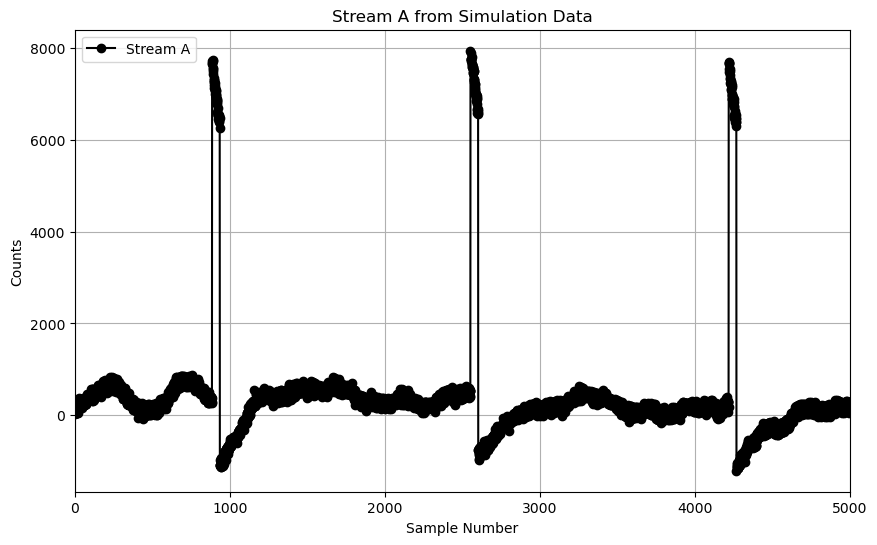

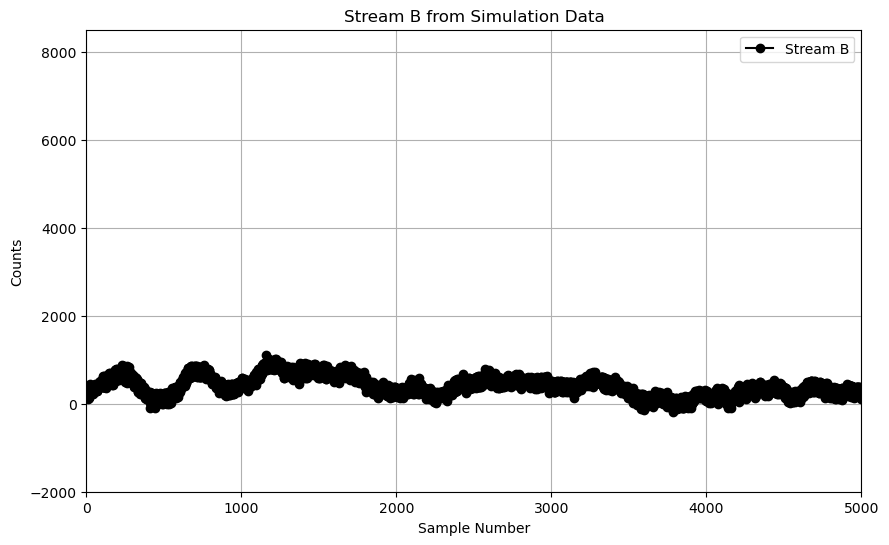

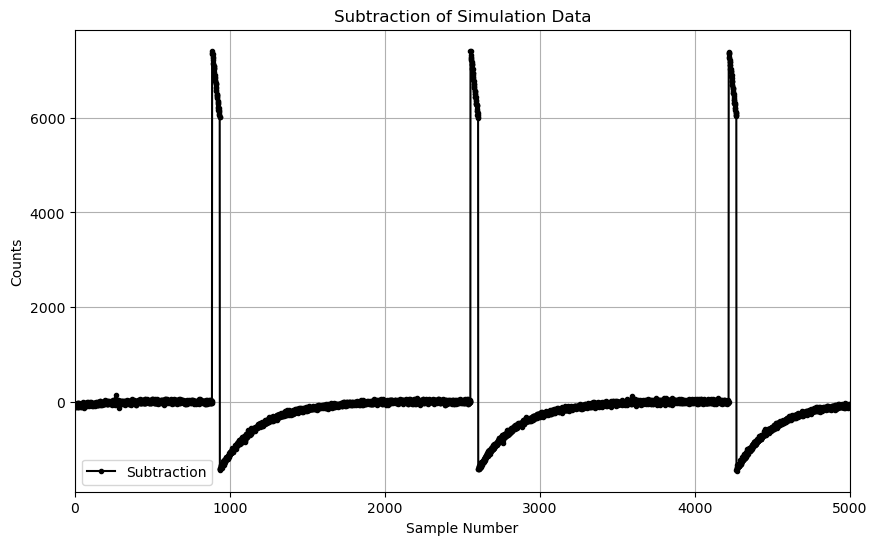

In [251]:
# Plotting stream_A
plt.figure(figsize=(10, 6))
plt.plot(stream_A.index, stream_A['Value'], marker='o', linestyle='-', color='k', label='Stream A')
plt.title('Stream A from Simulation Data')
plt.xlabel('Sample Number')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.xlim(0, 5000)  # Set x-axis limits
plt.savefig("noisy_A_df.png")
plt.show()

# Plotting stream_B
plt.figure(figsize=(10, 6))
plt.plot(stream_B.index, stream_B['Value'], marker='o', linestyle='-', color='k', label='Stream B')
plt.title('Stream B from Simulation Data')
plt.xlabel('Sample Number')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.xlim(0, 5000)  # Set x-axis limits
plt.ylim(-2000, 8500)
plt.show()

# Plotting df_subtraction
plt.figure(figsize=(10, 6))
plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Subtraction')
plt.title('Subtraction of Simulation Data')
plt.xlabel('Sample Number')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.xlim(0, 5000)  # Set x-axis limits
plt.show()


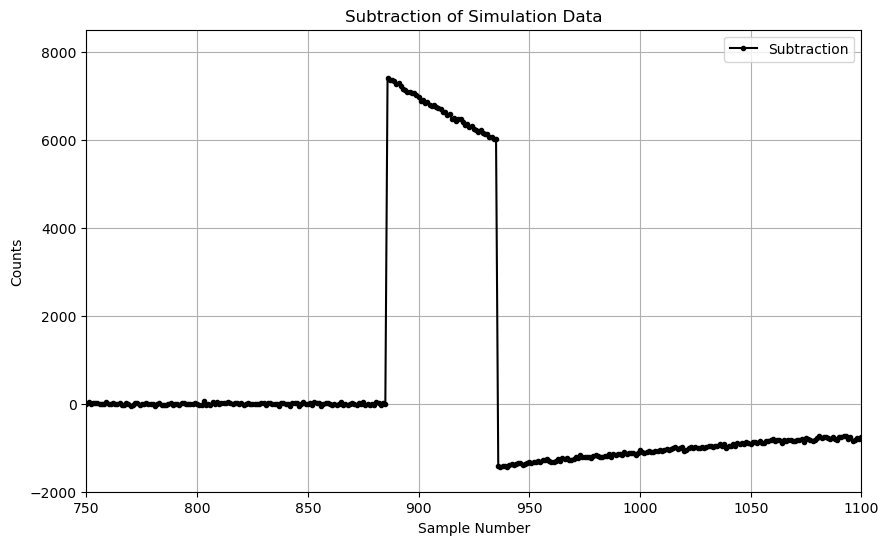

In [231]:
# Plotting df_subtraction
plt.figure(figsize=(10, 6))
plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Subtraction')
plt.title('Subtraction of Simulation Data')
plt.xlabel('Sample Number')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.xlim(750, 1100)  
plt.ylim(-2000, 8500) 
plt.savefig("df_sub_zoom.png")
plt.show()



Noise data taken from tek0001CH2 -- did this step elsewhere but want to keep this code for future reference

### Droop Correction

0        -61.268292
1       -121.800478
2       -117.310672
3        -54.543779
4        -76.873646
            ...    
87359           NaN
87360           NaN
87361           NaN
87362           NaN
87363           NaN
Length: 87364, dtype: float64


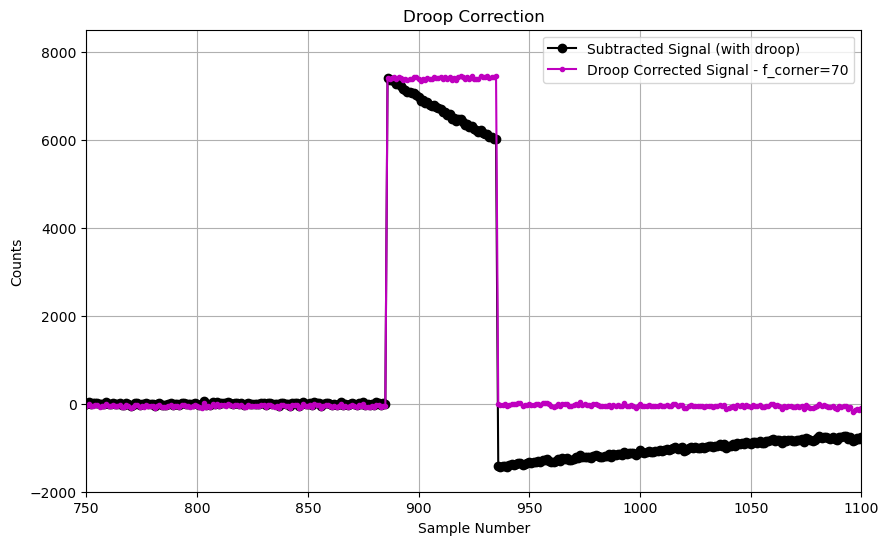

In [235]:
import matplotlib.colors as mcolors

sampling_rate = 100000  # 100 kHz sampling rate, in Hz
time_step = 1 / sampling_rate 
#signal_frequency = 100  # 100 Hz square wave from signal generator

f_corner =  70 # what is the droop frequency? estimated 10 HZ for the time being...
droopCorr = 2 * np.pi * f_corner

# calculate RC and k
k = 2 * np.pi * f_corner
RC = 1/k

# stream_A is old noisy_signal 
# df_subtraction is "clean"

#print(v1)
num_samples = len(df_subtraction)

droopCorr_signal = pd.Series(index=df_subtraction.index, dtype=float)
# initialize
integrated = 0.0

# apply droop correction, assume sampling interval is uniform
for i in range(num_samples - 1): # loop up to num_samples - 1 to avoid accessing out of bounds
    integrated += df_subtraction['Value'].iloc[i] * time_step # Accessing the first column of v1
    droopCorr_signal[i] = df_subtraction['Value'].iloc[i] + integrated * droopCorr

print(droopCorr_signal)

plt.figure(figsize=(10, 6))
plt.plot(df_subtraction.index, df_subtraction['Value'], marker='o', linestyle='-', color='k', label='Subtracted Signal (with droop)')
plt.plot(droopCorr_signal.index, droopCorr_signal, marker='.', linestyle='-', color='m', label='Droop Corrected Signal - f_corner=70')
plt.title('Droop Correction')
plt.xlabel('Sample Number')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.xlim(750, 1100)  
plt.ylim(-2000, 8500) 
plt.savefig("droop_corr.png")
plt.show()

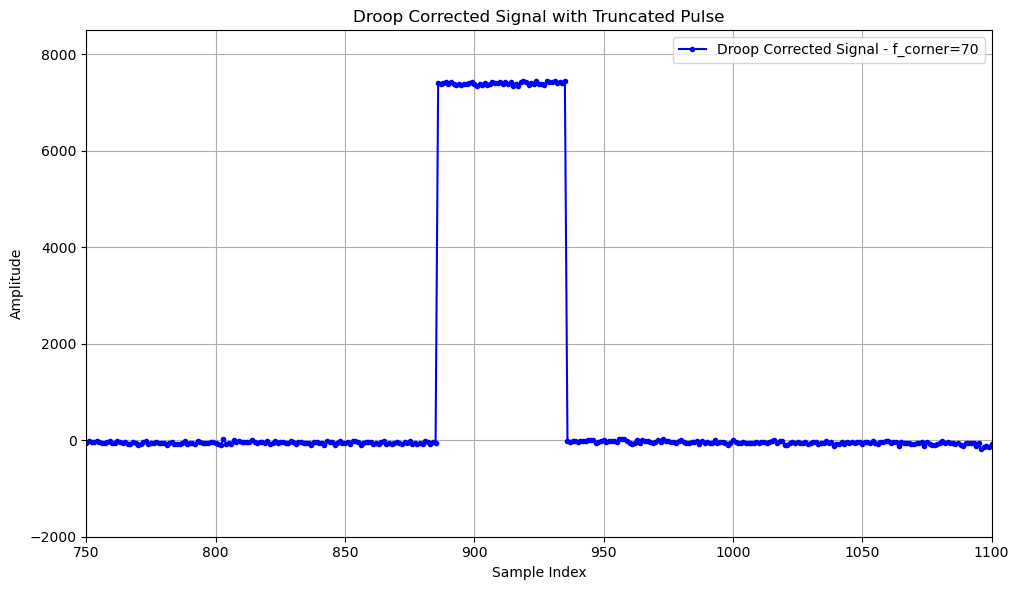

In [241]:
# Example indices defining the pulse
start_index = 750
end_index = 1100

# Truncate droopCorr_signal to include only the pulse
truncated_signal = droopCorr_signal.iloc[start_index:end_index]

# Shift the data downwards so that minimum on y-axis is 0
#min_value = truncated_signal.min()
#droopCorr_shifted_signal = truncated_signal - min_value

plt.figure(figsize=(10, 6))
plt.plot(droopCorr_signal.index, droopCorr_signal, marker='.', linestyle='-', color='b', label='Droop Corrected Signal - f_corner=70')
#plt.plot(droopCorr_shifted_signal.index, droopCorr_shifted_signal, marker='.', linestyle='-', color='r', label='Droop corrected and shifted Pulse')
plt.title('Droop Corrected Signal with Truncated Pulse')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.xlim(750, 1100)  
plt.ylim(-2000, 8500)
plt.savefig("mode_filtered.png")
plt.show()

Mode filter

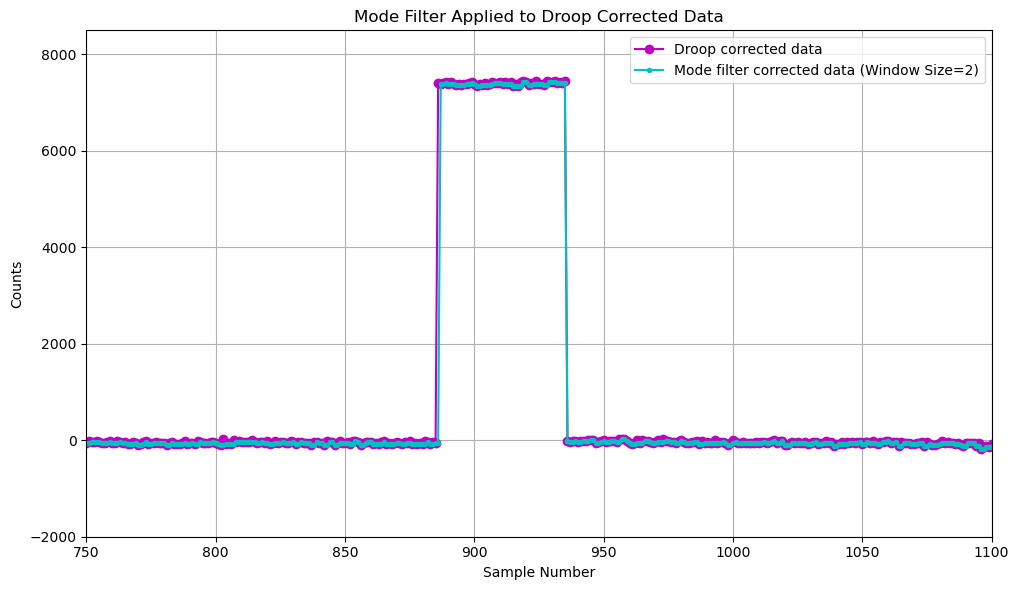

In [249]:
import matplotlib.colors as mcolors
window_size = 2

mode_filtered = droopCorr_signal.rolling(window=window_size, min_periods=1).apply(lambda x: x.mode()[0])

plt.figure(figsize=(10, 6))
#plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Original Signal (with droop)')
plt.plot(droopCorr_signal.index, droopCorr_signal.values, marker='o', linestyle='-', color='m', label='Droop corrected data')
#plt.plot(droopCorr_shifted_signal.index, droopCorr_shifted_signal.values, marker='.', linestyle='-', color='g', label='Droop corrected and shifted signal')
plt.plot(mode_filtered.index, mode_filtered, marker='.', linestyle='-', color='c', label=f'Mode filter corrected data (Window Size={window_size})')
plt.title('Mode Filter Applied to Droop Corrected Data'.format(window_size))
plt.xlabel('Sample Number')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(750, 1100)  
plt.ylim(-2000, 8500)
plt.savefig("mode_filtered.png")
 
plt.show()

Integration

In [95]:
integral_droop = droopCorr_signal.sum()
integral_mode = mode_filtered.sum()
integral_og = df_subtraction.sum()

print("Integral of original:", integral_og)
print("Integral of droop_corrected:", integral_droop)
print("Integral of mode_filtered:", integral_mode)

Integral of original: Value   -29447.0
dtype: float64
Integral of droop_corrected: 538556.2674059236
Integral of mode_filtered: 448189.75614140654


#############################################################################################################################
## STOP HERE
#############################################################################################################################

### Averaging / Filtering

##### Decimation, Moving Average, Mode Filter, Median Filter

##### Use noisy_signal as signal; can replace with different variations of noise later if needed

Decimation:

Decimated signal length: 10921


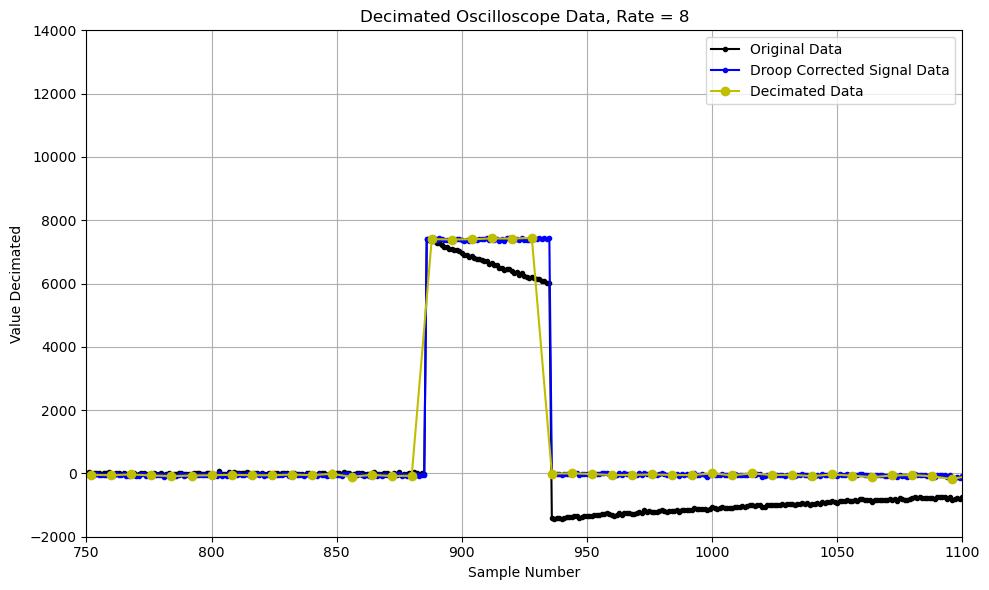

In [102]:
rate = 8

df_decimated = droopCorr_signal[::rate]

#print("Original signal length:", len(noisy_signal))
print("Decimated signal length:", len(df_decimated))

# Plotting the decimated Series on a new figure
plt.figure(figsize=(10, 6))
plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Original Data')
plt.plot(np.arange(len(droopCorr_signal)), droopCorr_signal, marker='.', linestyle='-', color='b', label='Droop Corrected Signal Data') 
plt.plot(df_decimated.index, df_decimated, marker='o', linestyle='-', color='y', label='Decimated Data')
plt.title('Decimated Oscilloscope Data, Rate = {}'.format(rate))
plt.xlabel('Sample Number')
plt.ylabel('Value Decimated')
plt.grid(True)
plt.legend()
plt.xlim(750, 1100)   
plt.ylim(-2000, 14000) 
plt.tight_layout()
plt.show()

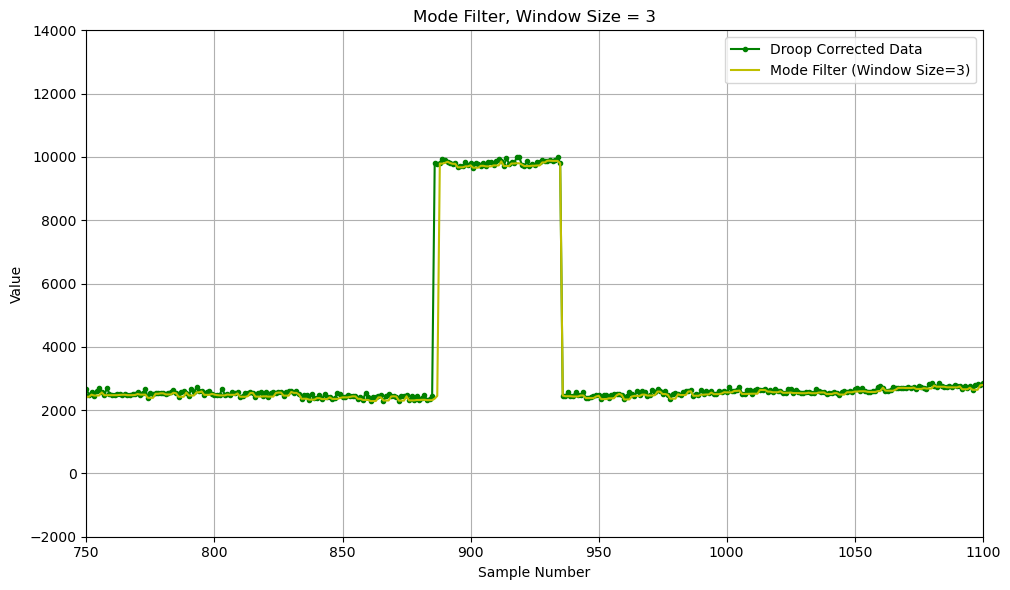

In [57]:
window_size = 3

mode_filtered = droopCorr_signal.rolling(window=window_size, min_periods=1).apply(lambda x: x.mode()[0])

plt.figure(figsize=(10, 6))
#plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Original Data')
plt.plot(droopCorr_signal.index, droopCorr_signal.values, marker='.', linestyle='-', color='g', label='Droop Corrected Data')
plt.plot(mode_filtered.index, mode_filtered, marker='', linestyle='-', color='y', label=f'Mode Filter (Window Size={window_size})')
plt.title('Mode Filter, Window Size = {}'.format(window_size))
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(750, 1100) 
plt.ylim(-2000, 14000)
plt.show()

Moving Average:

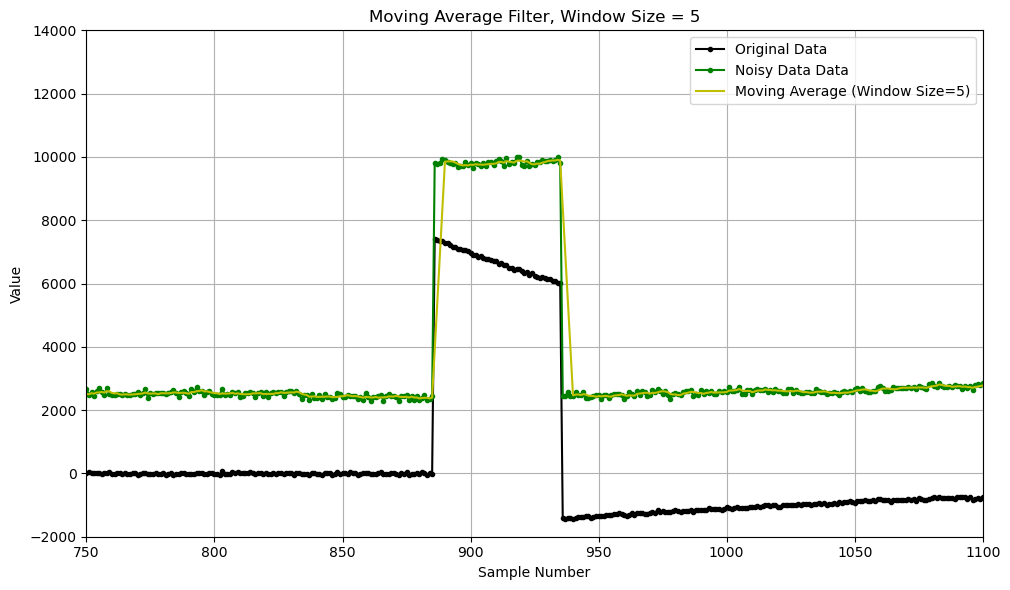

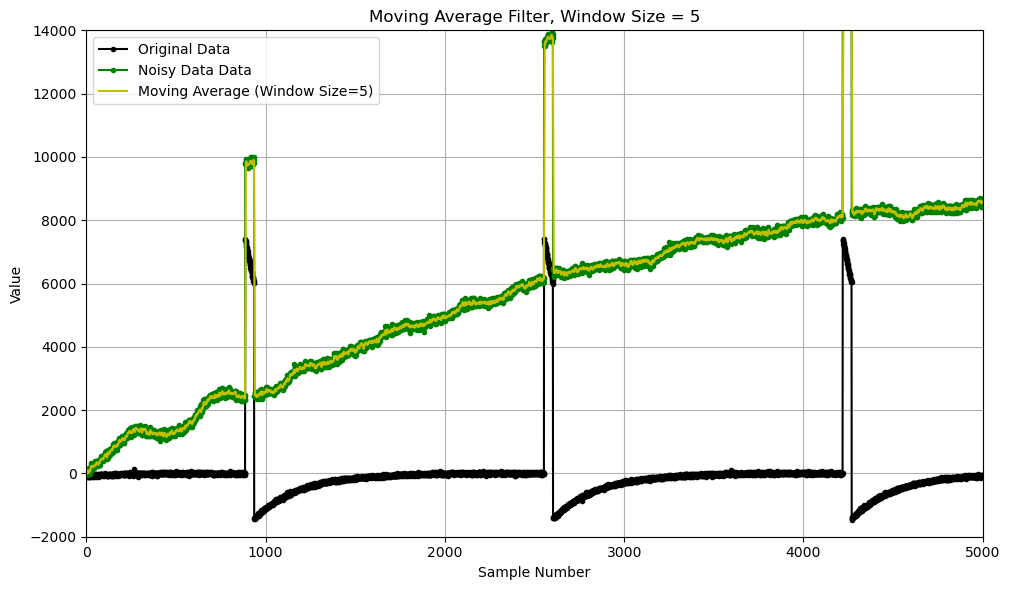

In [65]:
window_size = 5

moving_avg = droopCorr_signal.rolling(window=window_size, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Original Data')
plt.plot(droopCorr_signal.index, droopCorr_signal.values, marker='.', linestyle='-', color='g', label='Noisy Data Data')
plt.plot(moving_avg.index, moving_avg, marker='', linestyle='-', color='y', label=f'Moving Average (Window Size={window_size})')
plt.title('Moving Average Filter, Window Size = {}'.format(window_size))
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(750, 1100) 
plt.ylim(-2000, 14000)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Original Data')
plt.plot(droopCorr_signal.index, droopCorr_signal.values, marker='.', linestyle='-', color='g', label='Noisy Data Data')
plt.plot(moving_avg.index, moving_avg, marker='', linestyle='-', color='y', label=f'Moving Average (Window Size={window_size})')
plt.title('Moving Average Filter, Window Size = {}'.format(window_size))
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(0, 5000)  # set x-axis limits
plt.ylim(-2000, 14000) # set y axis limite
plt.show()

Mode Filter:

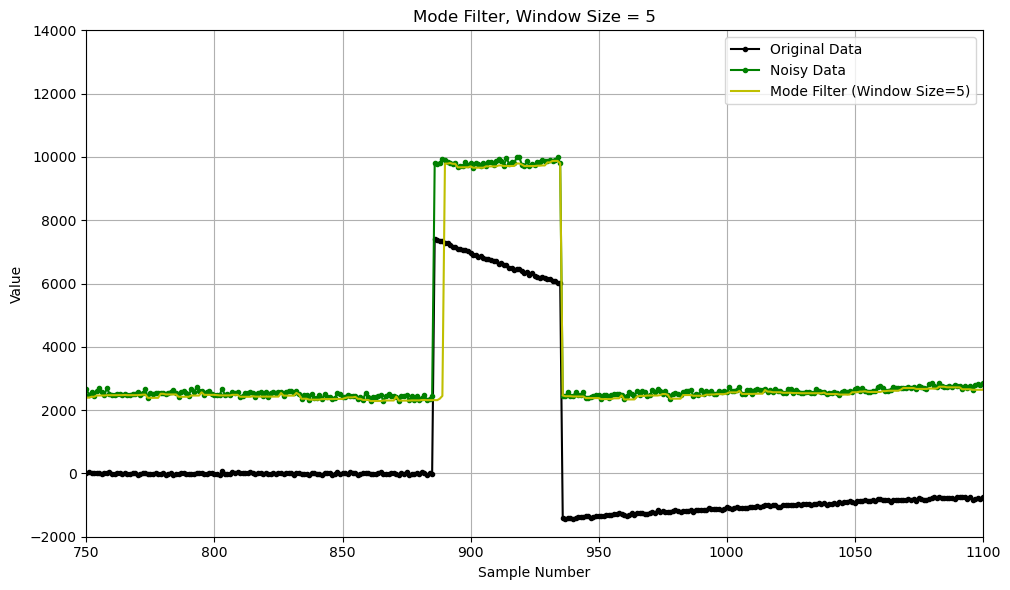

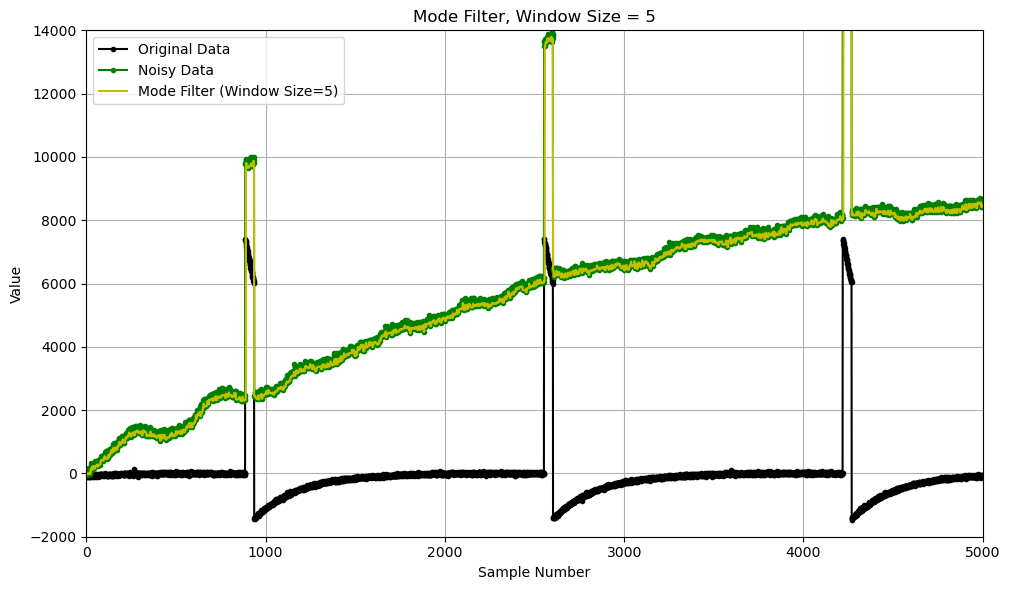

In [71]:
window_size = 5

mode_filtered = droopCorr_signal.rolling(window=window_size, min_periods=1).apply(lambda x: x.mode()[0])

plt.figure(figsize=(10, 6))
plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Original Data')
plt.plot(droopCorr_signal.index, droopCorr_signal.values, marker='.', linestyle='-', color='g', label='Noisy Data')
plt.plot(mode_filtered.index, mode_filtered, marker='', linestyle='-', color='y', label=f'Mode Filter (Window Size={window_size})')
plt.title('Mode Filter, Window Size = {}'.format(window_size))
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(750, 1100) 
plt.ylim(-2000, 14000)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Original Data')
plt.plot(droopCorr_signal.index, droopCorr_signal.values, marker='.', linestyle='-', color='g', label='Noisy Data')
plt.plot(mode_filtered.index, mode_filtered, marker='', linestyle='-', color='y', label=f'Mode Filter (Window Size={window_size})')
plt.title('Mode Filter, Window Size = {}'.format(window_size))
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(0, 5000)  # set x-axis limits
plt.ylim(-2000, 14000) # set y axis limite
plt.show()

Median Filter: 

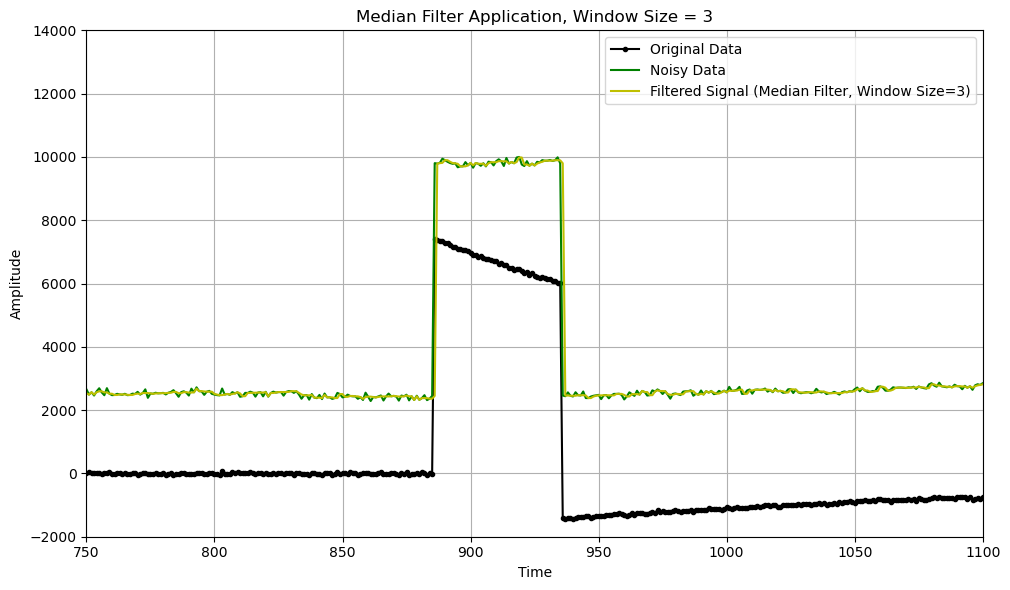

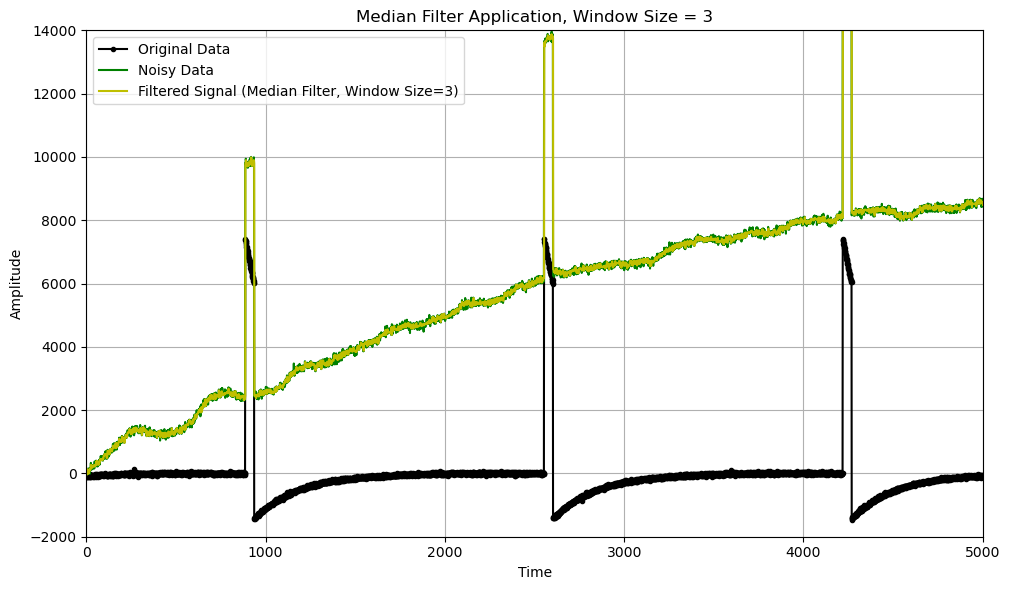

In [75]:
window_size = 3  # Adjust window size as needed, 12 seems to be "sweet spot" for flat signal
median_filtered = droopCorr_signal.rolling(window=window_size, min_periods=1).median()

# plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Original Data')
plt.plot(droopCorr_signal.index, droopCorr_signal.values, 'g', label='Noisy Data')
plt.plot(median_filtered.index, median_filtered.values, 'y', label=f'Filtered Signal (Median Filter, Window Size={window_size})')
plt.title('Median Filter Application, Window Size = {}'.format(window_size))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(750, 1100) 
plt.ylim(-2000, 14000)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_subtraction.index, df_subtraction['Value'], marker='.', linestyle='-', color='k', label='Original Data')
plt.plot(droopCorr_signal.index, droopCorr_signal.values, 'g', label='Noisy Data')
plt.plot(median_filtered.index, median_filtered.values, 'y', label=f'Filtered Signal (Median Filter, Window Size={window_size})')
plt.title('Median Filter Application, Window Size = {}'.format(window_size))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 5000)  # set x-axis limits
plt.ylim(-2000, 14000) # set y axis limite
plt.show()

### Integration -- strangely not working in this dataset???

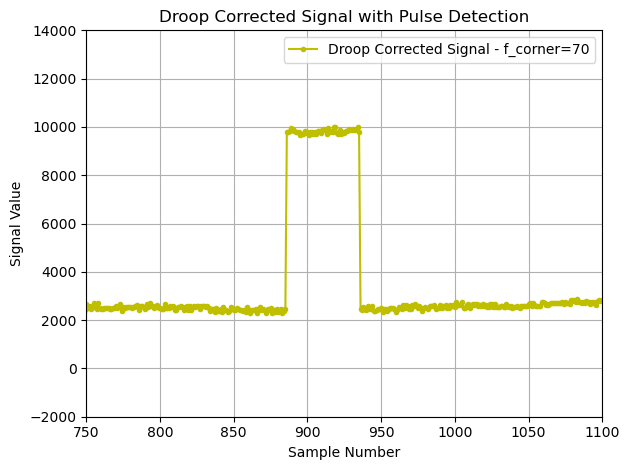

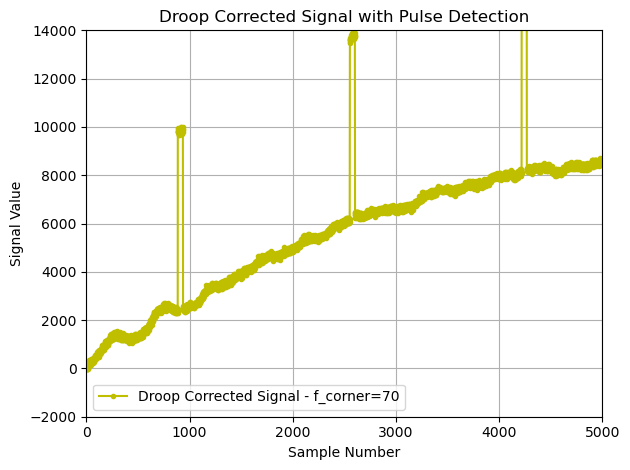

Pulse Integrals: [4.83597104e+05 4.81689052e+05 8.92692259e+03 3.09781000e+03
 2.86289077e+03 2.35516860e+04 2.93288558e+03 6.03428736e+03
 2.58176268e+07]


In [99]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 5000 # len(droopCorr_signal)  # Length of your dataset
sampling_rate = 100000  # Example sampling rate in Hz

# plot signal
plt.plot(droopCorr_signal.index, droopCorr_signal, marker='.', linestyle='-', color='y', label='Droop Corrected Signal - f_corner=70')
plt.xlim(750, 1100) 
plt.ylim(-2000, 14000)
plt.xlabel('Sample Number')
plt.ylabel('Signal Value')
plt.title('Droop Corrected Signal with Pulse Detection')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(droopCorr_signal.index, droopCorr_signal, marker='.', linestyle='-', color='y', label='Droop Corrected Signal - f_corner=70')
plt.xlim(0, 5000) 
plt.ylim(-2000, 14000)
plt.xlabel('Sample Number')
plt.ylabel('Signal Value')
plt.title('Droop Corrected Signal with Pulse Detection')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Example threshold for edge detection
threshold = 3000 

# rising edge detection
rising_edges = np.where(np.diff(droopCorr_signal > threshold) > 0)[0]

# initialize lists 
pulse_values = []
pulse_integrals = []

# iterate through each rising edge to find characteristics of each pulse
for i in range(len(rising_edges) - 1):
    start_index = rising_edges[i]
    end_index = rising_edges[i + 1]

    # calculate pulse integral (sum of values)
    pulse_integral = np.sum(droopCorr_signal[start_index:end_index])
    pulse_integrals.append(pulse_integral)

    pulse_values.append({
        'start_index': start_index,
        'end_index': end_index,
        'max_value': np.max(droopCorr_signal[start_index:end_index]),
        'duration': (end_index - start_index) / sampling_rate  # in seconds
    })

# convert pulse_integrals to numpy array 
pulse_integrals = np.array(pulse_integrals)

# output
print("Pulse Integrals:", pulse_integrals)




# Ignore things below: will move somewhere else eventually

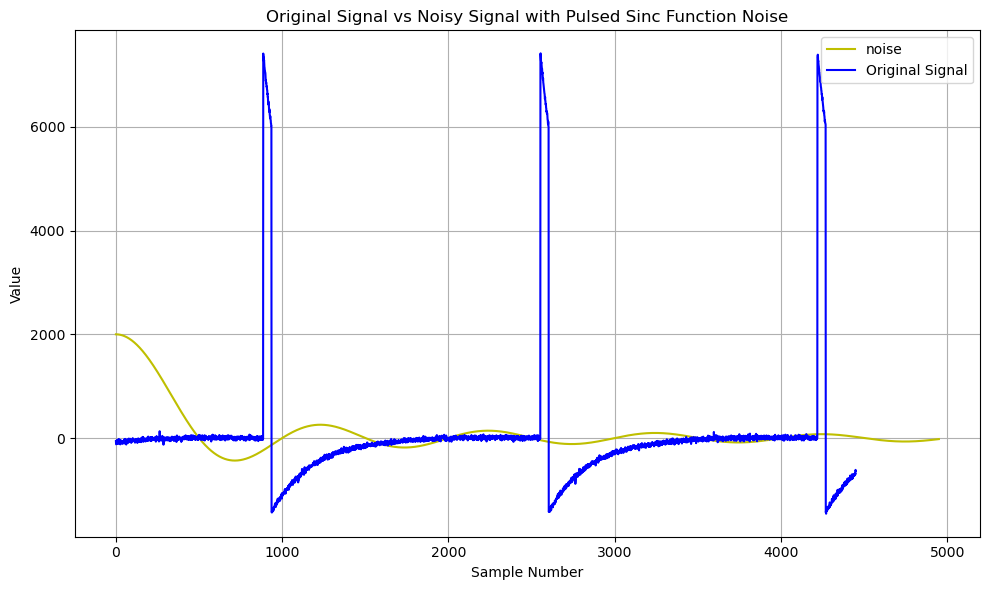

In [256]:
signal = df_subtraction

t = np.arange(len(signal))

period = 500  # Adjust as needed
amplitude = 2000  # Adjust as needed

# Generate the pulsed sinc function noise
sinc_noise = pulsed_sinc(t, period, amplitude)

# Create a new DataFrame or store noisy signal in a separate variable
pulsedSinc_signal = signal['Value'] + sinc_noise

import matplotlib.pyplot as plt

# Plotting the signals
plt.figure(figsize=(10, 6))
plt.plot(signal.index, sinc_noise, label='noise', color='y')
plt.plot(signal.index, signal['Value'], label='Original Signal', color='b')
#plt.plot(signal.index, pulsedSinc_signal, label='Noisy Signal with Pulsed Sinc Function Noise', color='b', alpha=0.7)  # Alpha for transparency
plt.title('Original Signal vs Noisy Signal with Pulsed Sinc Function Noise')
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##### Decimation

Original signal length: 4950
Decimated signal length: 495


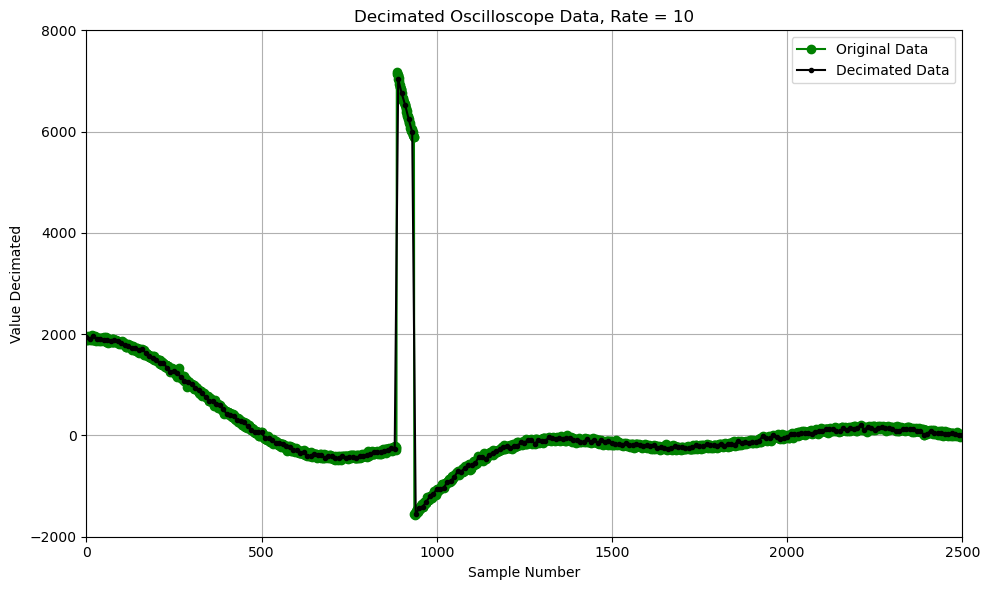

In [200]:
rate = 10

df_decimated = pulsedSinc_signal[::rate]

print("Original signal length:", len(pulsedSinc_signal))
print("Decimated signal length:", len(df_decimated))

# Plotting the decimated Series on a new figure
plt.figure(figsize=(10, 6))
plt.plot(pulsedSinc_signal.index, pulsedSinc_signal, marker='o', linestyle='-', color='g', label='Original Data') 
plt.plot(df_decimated.index, df_decimated.values, marker='.', linestyle='-', color='k', label='Decimated Data')
plt.title('Decimated Oscilloscope Data, Rate = {}'.format(rate))
plt.xlabel('Sample Number')
plt.ylabel('Value Decimated')
plt.grid(True)
plt.legend()

plt.xlim(0, 2500)  # set x-axis limits
plt.ylim(-2000, 8000) # set y axis limite

plt.tight_layout()

plt.show()

##### Moving Average

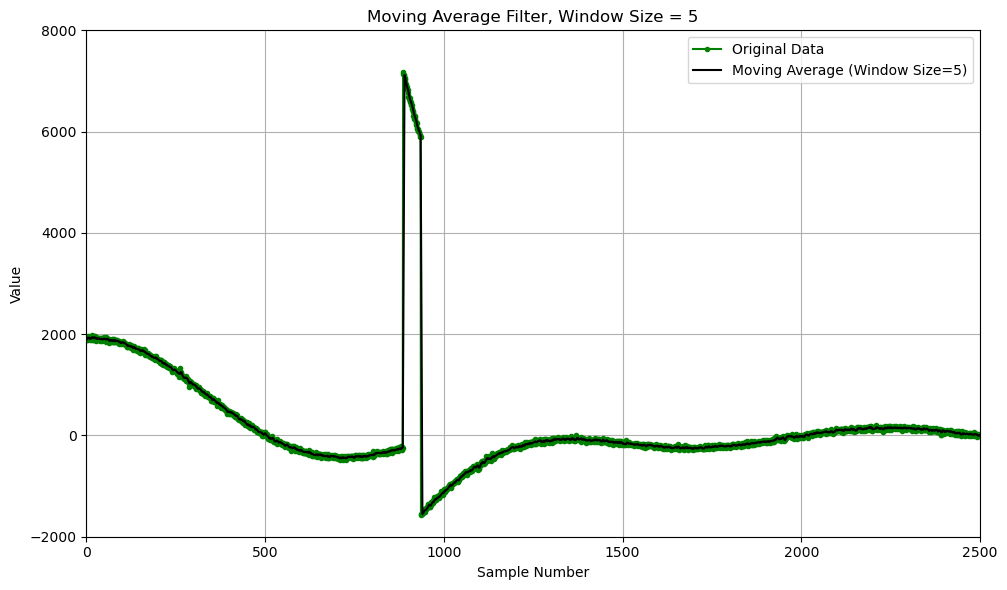

In [172]:
window_size = 5

moving_avg = pulsedSinc_signal.rolling(window=window_size, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(pulsedSinc_signal.index, pulsedSinc_signal.values, marker='.', linestyle='-', color='g', label='Original Data')
plt.plot(moving_avg.index, moving_avg, marker='', linestyle='-', color='k', label=f'Moving Average (Window Size={window_size})')
plt.title('Moving Average Filter, Window Size = {}'.format(window_size))
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.xlim(0, 2500)  # set x-axis limits
plt.ylim(-2000, 8000) # set y axis limite

plt.show()

##### Mode Filter

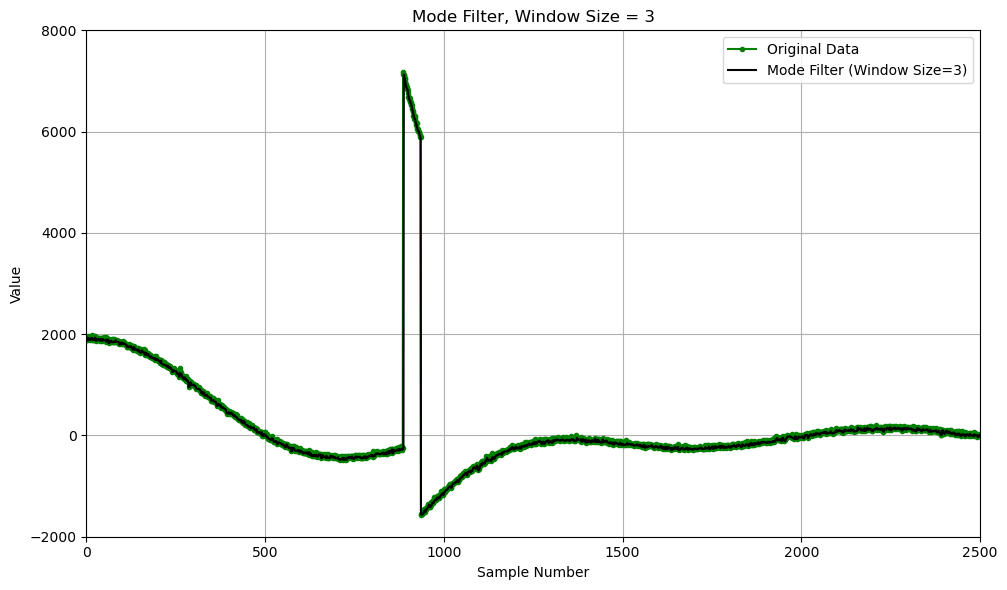

In [178]:
window_size = 3

mode_filtered = pulsedSinc_signal.rolling(window=window_size, min_periods=1).apply(lambda x: x.mode()[0])

plt.figure(figsize=(10, 6))
plt.plot(pulsedSinc_signal.index, pulsedSinc_signal.values, marker='.', linestyle='-', color='g', label='Original Data')
plt.plot(mode_filtered.index, mode_filtered, marker='', linestyle='-', color='k', label=f'Mode Filter (Window Size={window_size})')
plt.title('Mode Filter, Window Size = {}'.format(window_size))
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.xlim(0, 2500)  # set x-axis limits
plt.ylim(-2000, 8000) # set y axis limite

plt.show()

##### Median Filter

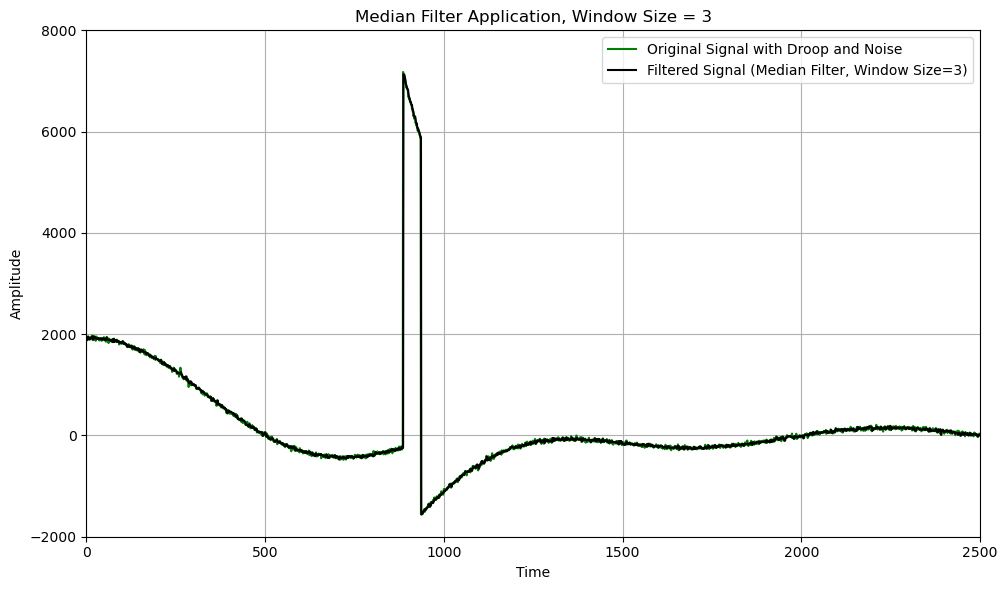

In [184]:
window_size = 3  # Adjust window size as needed, 12 seems to be "sweet spot" for flat signal
median_filtered = pulsedSinc_signal.rolling(window=window_size, min_periods=1).median()

# plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(pulsedSinc_signal.index, pulsedSinc_signal.values, 'g', label='Original Signal with Droop and Noise')
plt.plot(median_filtered.index, median_filtered.values, 'k', label=f'Filtered Signal (Median Filter, Window Size={window_size})')
plt.title('Median Filter Application, Window Size = {}'.format(window_size))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.xlim(0, 2500)  # set x-axis limits
plt.ylim(-2000, 8000) # set y axis limite

plt.show()

#### FM Chirp Noise added to signal

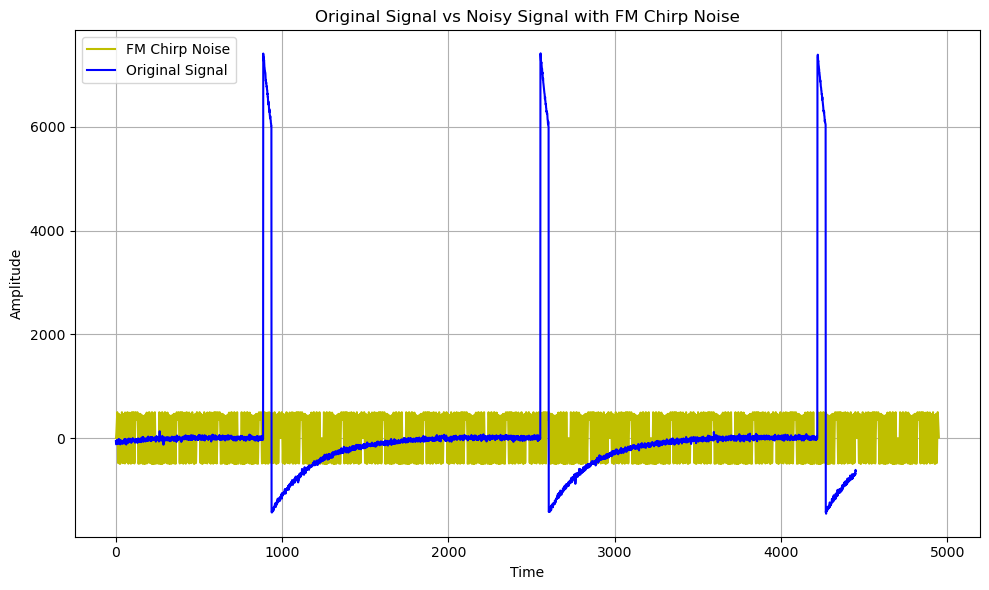

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate FM chirp noise
def generate_fm_chirp(t, f0, f1, duration, amplitude):
    """
    Generate FM chirp noise.
    
    Parameters:
    - t: Time vector
    - f0: Starting frequency
    - f1: Ending frequency
    - duration: Duration of the chirp signal
    - amplitude: Amplitude of the chirp signal
    
    Returns:
    - chirp_noise: Generated FM chirp noise
    """
    phi = 2 * np.pi * (f0 * t + 0.5 * (f1 - f0) * t**2 / duration)
    chirp_noise = amplitude * np.sin(phi)
    return chirp_noise

t = np.arange(len(df_subtraction))  # Time vector based on the length of your DataFrame
signal = df_subtraction['Value']  # Assuming 'Value' is the column name in your DataFrame

# Example parameters for FM chirp noise
duration = len(signal)  # Use the same duration as the signal
f0 = 10  # Starting frequency of chirp
f1 = 50  # Ending frequency of chirp
amplitude = 500  # Adjust as needed

# Generate FM chirp noise
fm_chirp_noise = generate_fm_chirp(t, f0, f1, duration, amplitude)

# Convert fm_chirp_noise to a pandas Series with the same index as signal
fm_chirp_noise_series = pd.Series(fm_chirp_noise, index=signal.index)

# Create a noisy signal by adding FM chirp noise to the original signal
chirpy_signal = signal + fm_chirp_noise_series

# Plotting the signals
plt.figure(figsize=(10, 6))
plt.plot(signal.index, fm_chirp_noise_series, label='FM Chirp Noise', color='y')
plt.plot(signal.index, signal, label='Original Signal', color='b')
#plt.plot(signal.index, chirpy_signal, label='Noisy Signal with FM Chirp Noise', color='r', alpha=0.7)  # Alpha for transparency
plt.title('Original Signal vs Noisy Signal with FM Chirp Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##### Decimation

Original signal length: 4950
Decimated signal length: 495


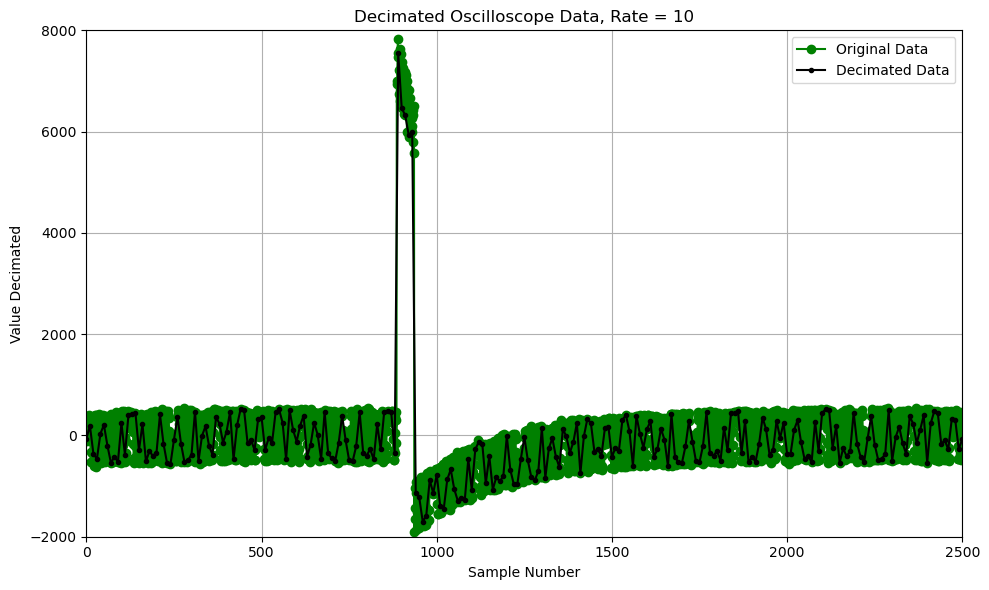

In [245]:
rate = 10

df_decimated = chirpy_signal[::rate]

print("Original signal length:", len(chirpy_signal))
print("Decimated signal length:", len(df_decimated))

# Plotting the decimated Series on a new figure
plt.figure(figsize=(10, 6))
plt.plot(chirpy_signal.index, chirpy_signal, marker='o', linestyle='-', color='g', label='Original Data') 
plt.plot(df_decimated.index, df_decimated.values, marker='.', linestyle='-', color='k', label='Decimated Data')
plt.title('Decimated Oscilloscope Data, Rate = {}'.format(rate))
plt.xlabel('Sample Number')
plt.ylabel('Value Decimated')
plt.grid(True)
plt.legend()

plt.xlim(0, 2500)  # set x-axis limits
plt.ylim(-2000, 8000) # set y axis limite

plt.tight_layout()

plt.show()

##### Moving Average

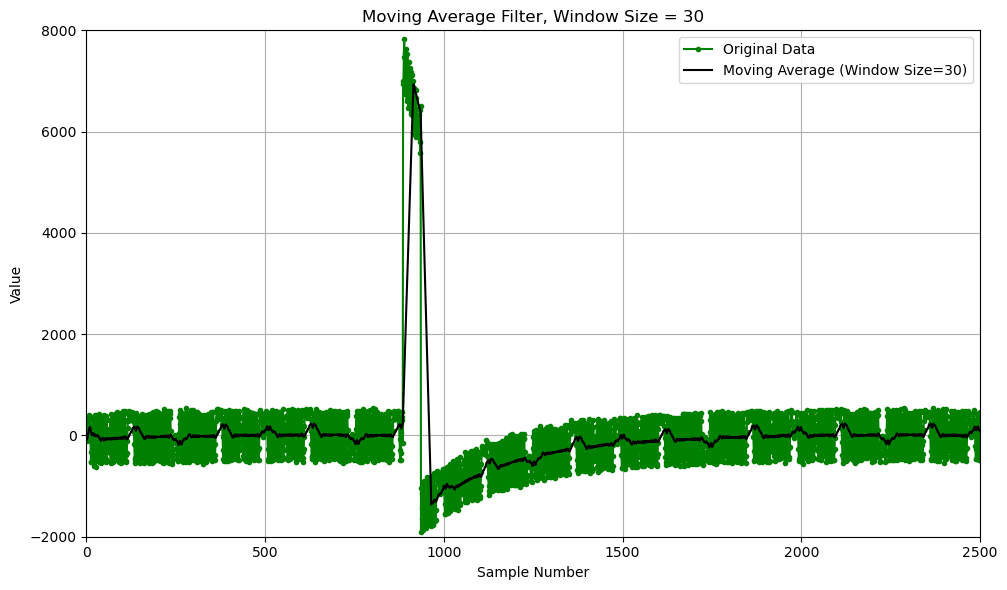

In [248]:
window_size = 30

moving_avg = chirpy_signal.rolling(window=window_size, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(chirpy_signal.index, chirpy_signal.values, marker='.', linestyle='-', color='g', label='Original Data')
plt.plot(moving_avg.index, moving_avg, marker='', linestyle='-', color='k', label=f'Moving Average (Window Size={window_size})')
plt.title('Moving Average Filter, Window Size = {}'.format(window_size))
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.xlim(0, 2500)  # set x-axis limits
plt.ylim(-2000, 8000) # set y axis limite

plt.show()

##### Mode Filter

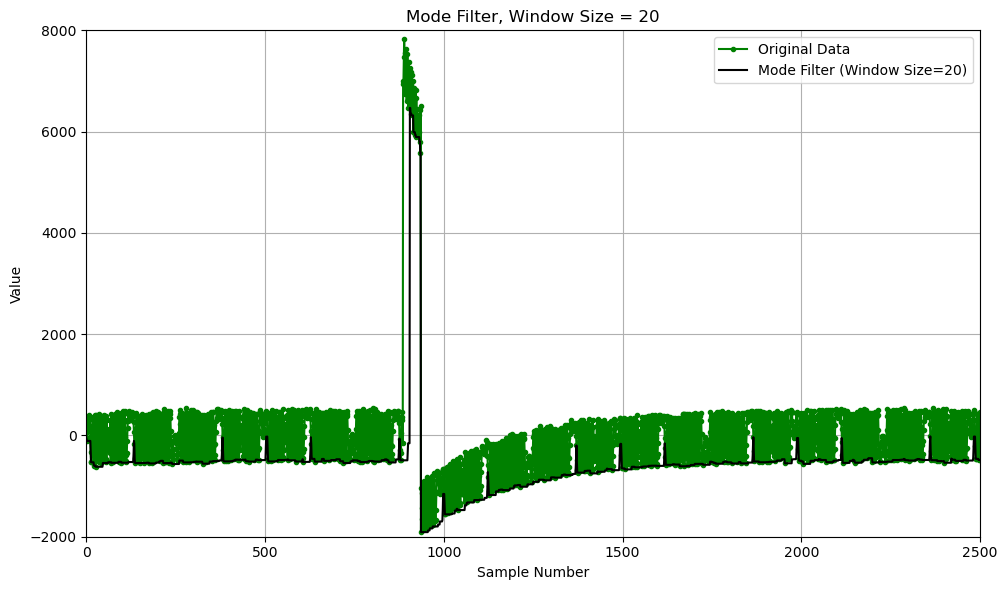

In [251]:
window_size = 20

mode_filtered = chirpy_signal.rolling(window=window_size, min_periods=1).apply(lambda x: x.mode()[0])

plt.figure(figsize=(10, 6))
plt.plot(chirpy_signal.index, chirpy_signal.values, marker='.', linestyle='-', color='g', label='Original Data')
plt.plot(mode_filtered.index, mode_filtered, marker='', linestyle='-', color='k', label=f'Mode Filter (Window Size={window_size})')
plt.title('Mode Filter, Window Size = {}'.format(window_size))
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.xlim(0, 2500)  # set x-axis limits
plt.ylim(-2000, 8000) # set y axis limite

plt.show()

##### Median Filter

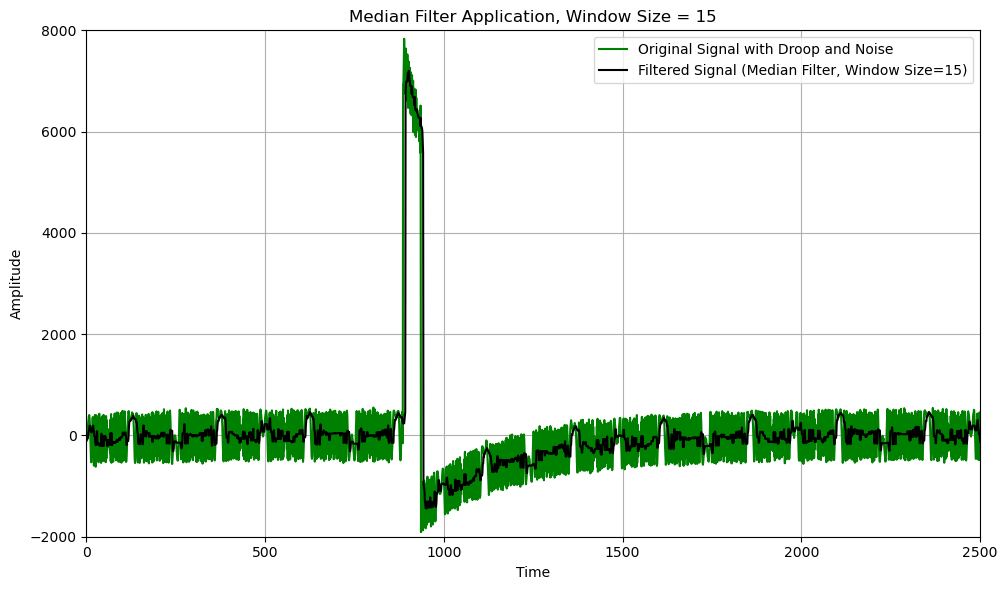

In [254]:
window_size = 15 # Adjust window size as needed, 12 seems to be "sweet spot" for flat signal
median_filtered = chirpy_signal.rolling(window=window_size, min_periods=1).median()

# plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(chirpy_signal.index, chirpy_signal.values, 'g', label='Original Signal with Droop and Noise')
plt.plot(median_filtered.index, median_filtered.values, 'k', label=f'Filtered Signal (Median Filter, Window Size={window_size})')
plt.title('Median Filter Application, Window Size = {}'.format(window_size))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.xlim(0, 2500)  # set x-axis limits
plt.ylim(-2000, 8000) # set y axis limite

plt.show()